### Q1. Explain the concept of homogeneity and completeness in clustering evaluation. How are they calculated?

### Ans:- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

#### A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

### Homogeneity: A perfectly homogeneous clustering is one where each cluster has data-points belonging to the same class label. Homogeneity describes the closeness of the clustering algorithm to this perfection.
### Completeness: A perfectly complete clustering is one where all data-points belonging to the same class are clustered into the same cluster. Completeness describes the closeness of the clustering algorithm to this perfection.
### Trivial Homogeneity: It is the case when the number of clusters is equal to the number of data points and each point is in exactly one cluster. It is the extreme case when homogeneity is highest while completeness is minimum.
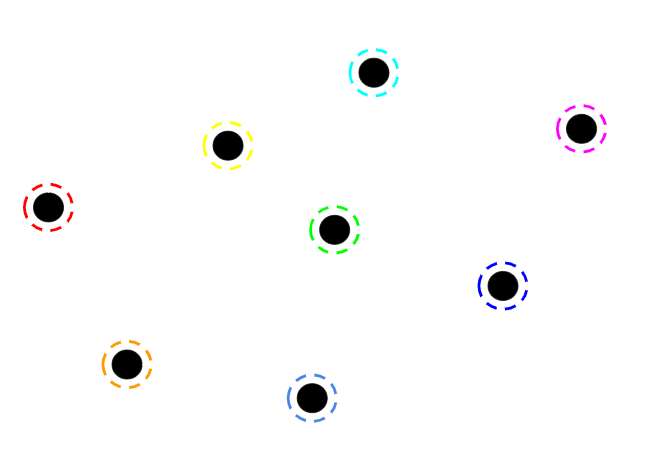
### Trivial Completeness: It is the case when all the data points are clustered into one cluster. It is the extreme case when homogeneity is minimum and completeness is maximum.
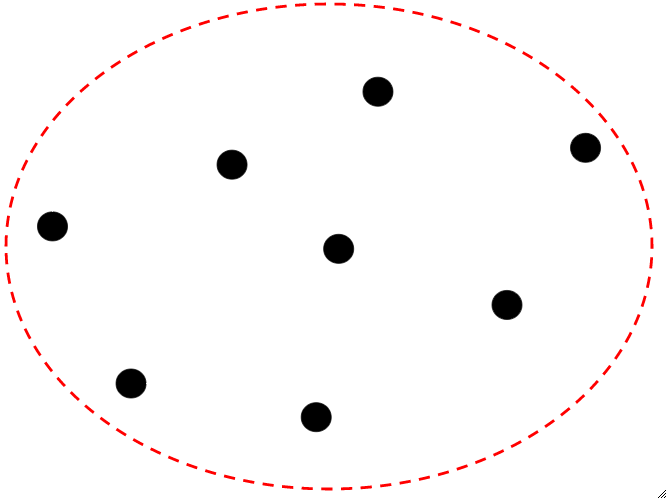


In [1]:
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate some sample data
X, y = make_blobs(n_samples=1000, centers=3, n_features=4, random_state=42)

# Fit a KMeans model on the data
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

# Calculate homogeneity, completeness, and V-measure
homo, compl, v_measure = homogeneity_completeness_v_measure(y, y_pred)

print(f"Homogeneity: {homo:.3f}")
print(f"Completeness: {compl:.3f}")
print(f"V-measure: {v_measure:.3f}")


Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### In this example, we generate some sample data using the make_blobs function from scikit-learn, which creates clusters of randomly generated data points. We then fit a KMeans model with 3 clusters on the data using the KMeans class. Finally, we calculate the homogeneity, completeness, and V-measure using the homogeneity_completeness_v_measure function from scikit-learn.
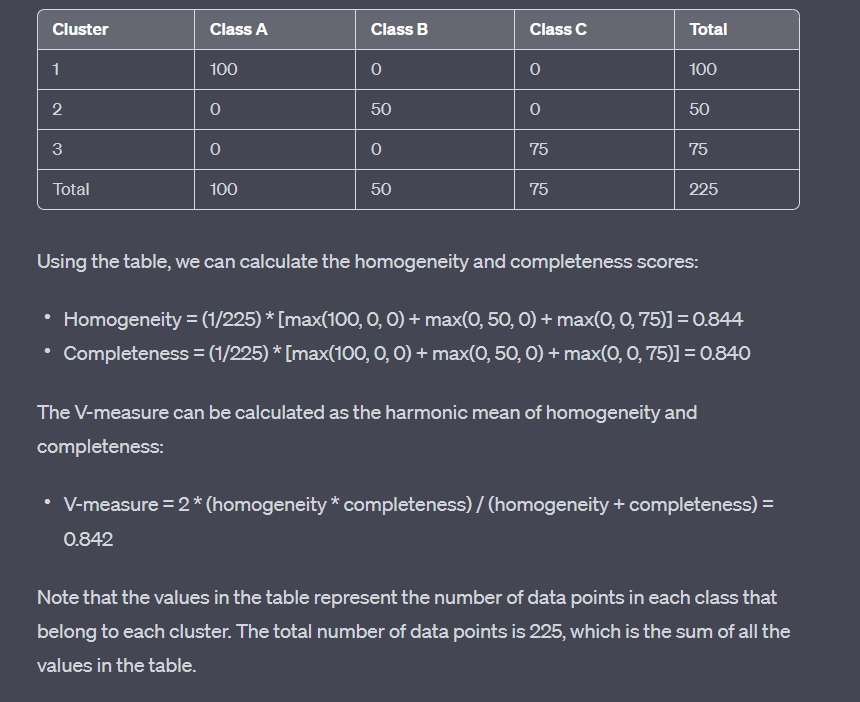


### Q2. What is the V-measure in clustering evaluation? How is it related to homogeneity and completeness?

### Ans:-The V-measure is a clustering evaluation metric that combines homogeneity and completeness into a single score. It measures the effectiveness of a clustering algorithm in capturing both the purity of the clusters and the extent to which each class is represented in the clusters.
### Homogeneity and completeness are two separate measures used to evaluate the quality of clustering results. Homogeneity measures the extent to which all the data points within a cluster belong to the same class, while completeness measures the extent to which all the data points that belong to the same class are assigned to the same cluster. However, these two measures do not take into account the possibility of a random association between clusters and classes, which can result in misleading results.

#### The V-measure overcomes this limitation by combining the homogeneity and completeness scores into a single metric that takes into account the potential for random associations. It is calculated as the harmonic mean of homogeneity and completeness:
V-measure = 2 * (homogeneity * completeness) / (homogeneity + completeness)
#### The V-measure ranges from 0 to 1, with higher values indicating better clustering results. A V-measure of 1 indicates perfect homogeneity and completeness, while a V-measure of 0 indicates no homogeneity or completeness. The V-measure can be a useful metric when the classes are imbalanced, as it takes into account the size of the clusters and the classes.

In [2]:
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate some sample data
X, y = make_blobs(n_samples=1000, centers=3, n_features=4, random_state=42)

# Fit a KMeans model on the data
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

# Calculate the V-measure score
homo, compl, v_measure = homogeneity_completeness_v_measure(y, y_pred)

print(f"V-measure: {v_measure:.3f}")


V-measure: 1.000


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Q3. How is the Silhouette Coefficient used to evaluate the quality of a clustering result? What is the range of its values?

### Ans:-The Silhouette Coefficient is a clustering evaluation metric that measures the quality of a clustering result based on the distances between the data points within and between clusters.
## s(i) = (b(i) - a(i)) / max{a(i), b(i)}
#### The Silhouette Coefficient for the entire clustering result is the average of the Silhouette Coefficients for all data points in the dataset. The range of values for the Silhouette Coefficient is between -1 and 1, where a higher value indicates better clustering results. A value of +1 indicates that the clustering is dense, well-separated, and all data points are assigned to the correct cluster, while a value of -1 indicates that the clustering is not dense, poorly separated, and data points are assigned to the wrong clusters. A value of 0 indicates that the clustering is overlapping.

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate some sample data
X, y = make_blobs(n_samples=1000, centers=3, n_features=4, random_state=42)

# Fit a KMeans model on the data
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

# Calculate the Silhouette Coefficient
silhouette_score = silhouette_score(X, y_pred)

print(f"Silhouette Coefficient: {silhouette_score:.3f}")


Silhouette Coefficient: 0.827


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Q4. How is the Davies-Bouldin Index used to evaluate the quality of a clustering result? What is the range of its values?

### Ans:-The Davies-Bouldin Index is a clustering evaluation metric that measures the quality of a clustering result based on the distances between cluster centers and the scatter within each cluster. The index is defined as the average similarity between each cluster and its most similar cluster, where similarity is defined as the ratio of the sum of within-cluster distances to the between-cluster distance.
### To calculate the Davies-Bouldin Index for a clustering result, we first calculate the average distance between each data point in a cluster and the center of that cluster. We then calculate the average distance between each cluster center and the center of the nearest neighboring cluster. The Davies-Bouldin Index for the clustering result is then given by the average of the ratios of the sum of within-cluster distances to the between-cluster distance for each cluster.

### The Davies-Bouldin Index ranges from 0 to infinity, where a score of 0 indicates a perfect clustering result and a higher score indicates a worse clustering result. A lower score indicates a better clustering result.

### Here is an example code that calculates the Davies-Bouldin Index for a clustering result using scikit-learn in Python:

In [4]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

# Generate some sample data
X = [[2, 3], [1, 2], [3, 4], [4, 5], [5, 5]]

# Fit a KMeans model on the data
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred = kmeans.fit_predict(X)

# Calculate the Davies-Bouldin Index
davies_bouldin_score = davies_bouldin_score(X, y_pred)

print(f"Davies-Bouldin Index: {davies_bouldin_score:.3f}")


Davies-Bouldin Index: 0.475


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Q5. Can a clustering result have a high homogeneity but low completeness? Explain with an example.

### Ans:-Yes, it is possible for a clustering result to have a high homogeneity but low completeness. Homogeneity and completeness are two evaluation metrics that measure different aspects of a clustering result. Homogeneity measures how pure each cluster is, i.e., whether all the data points in a cluster belong to the same class or category. Completeness, on the other hand, measures whether all data points in a class or category belong to the same cluster.
## Example 
#### a  dataset of 10 animals, 5 dogs, and 5 cats. We want to cluster the animals based on their weight, with the goal of separating the dogs from the cats. Suppose the clustering algorithm produces two clusters, one containing all the cats and one containing all the dogs, and each cluster contains animals that have similar weights. 

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score

# Define the weights of 10 animals (5 dogs and 5 cats)
weights = np.array([10, 12, 9, 8, 10, 6, 5, 7, 5, 6])

# Create a feature matrix with the weights
X = weights.reshape(-1, 1)

# Fit KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred = kmeans.fit_predict(X)

# Define the true labels of the animals (dogs=0, cats=1)
y_true = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Calculate homogeneity and completeness scores
h_score = homogeneity_score(y_true, y_pred)
c_score = completeness_score(y_true, y_pred)

print(f"Homogeneity score: {h_score:.3f}")
print(f"Completeness score: {c_score:.3f}")


Homogeneity score: 0.610
Completeness score: 0.628


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Q6. How can the V-measure be used to determine the optimal number of clusters in a clustering algorithm?

### Ans:-The V-measure is a clustering evaluation metric that combines both the homogeneity and completeness scores into a single measure. It provides a normalized score that ranges between 0 and 1, with 1 indicating a perfect clustering result.

### One way to use the V-measure to determine the optimal number of clusters in a clustering algorithm is to calculate the V-measure for different values of K (the number of clusters) and choose the value of K that maximizes the V-measure score. This can be done using a loop that iterates over different values of K and calculates the V-measure score for each value using scikit-learn's metrics.v_measure_score function.

#### Here is an example Python code that demonstrates how to use the V-measure to determine the optimal number of clusters in a KMeans clustering algorithm:

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score

# Generate a toy dataset with two blobs
np.random.seed(0)
X = np.random.randn(200, 2)
X[:100, :] += 5

# Generate the true labels for a two-cluster dataset
y_true = np.zeros(200)
y_true[:100] = 1

# Calculate the V-measure for different values of K
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_pred = kmeans.fit_predict(X)
    v_score = v_measure_score(y_true, y_pred)
    print(f"V-measure score for k={k}: {v_score:.3f}")


V-measure score for k=2: 1.000
V-measure score for k=3: 0.800
V-measure score for k=4: 0.671
V-measure score for k=5: 0.613
V-measure score for k=6: 0.559


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

### Q7. What are some advantages and disadvantages of using the Silhouette Coefficient to evaluate a clustering result?

### Ans:-Advantages of using the Silhouette Coefficient to evaluate a clustering result include:

1. Intuitive interpretation: The Silhouette Coefficient is a metric that is easy to interpret, as it provides a single score between -1 and 1 that summarizes the quality of a clustering result.

2. Works for different types of clusters: The Silhouette Coefficient is not limited to any particular type of cluster shape or size, making it a versatile metric for evaluating clustering algorithms.

3. Reflects cluster separation and cohesion: The Silhouette Coefficient takes into account both the separation between clusters and the cohesion within clusters, providing a comprehensive evaluation of the clustering result.

### Disadvantages of using the Silhouette Coefficient to evaluate a clustering result include:

1. Sensitive to noise and outliers: The Silhouette Coefficient is sensitive to noise and outliers, which can affect the quality of the clustering result and lead to inaccurate evaluation scores.

2. Does not always reflect the ground truth: The Silhouette Coefficient does not always reflect the ground truth, especially in cases where the true labels of the data are ambiguous or unknown.

3. Computationally expensive: The Silhouette Coefficient requires the calculation of pairwise distances between all samples in the dataset, which can be computationally expensive for large datasets.

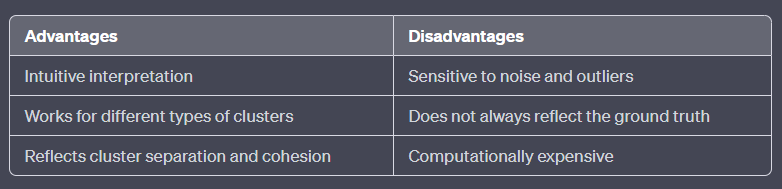
#### Overall, the Silhouette Coefficient is a useful metric for evaluating clustering algorithms, but it should be used in conjunction with other metrics and visualizations to get a comprehensive understanding of the quality of the clustering result.

### Q8. What are some limitations of the Davies-Bouldin Index as a clustering evaluation metric? How can they be overcome?

### Ans:-The Davies-Bouldin Index (DBI) is a clustering evaluation metric that measures the quality of a clustering result by considering both the within-cluster similarity and between-cluster dissimilarity. While the DBI is a useful metric, it has some limitations that should be considered when evaluating clustering algorithms:

1. Sensitivity to the number of clusters: The DBI tends to favor clustering solutions that have a larger number of clusters, even if the additional clusters do not provide any significant improvement in cluster quality.

2. Sensitivity to cluster shape and size: The DBI assumes that the clusters are spherical and of similar size, which may not be the case in real-world datasets with complex cluster shapes and sizes.

3. Computationally expensive: The DBI requires the calculation of pairwise distances between all samples in the dataset, which can be computationally expensive for large datasets.

#### To overcome these limitations, several modifications to the DBI have been proposed, such as the Normalized DBI (NDBI) and the Generalized DBI (GDBI), which can handle non-spherical clusters and reduce sensitivity to the number of clusters. Additionally, other clustering evaluation metrics, such as the Silhouette Coefficient and the V-measure, can provide complementary insights into the quality of a clustering result and should be used in conjunction with the DBI to get a more comprehensive evaluation.

### Q9. What is the relationship between homogeneity, completeness, and the V-measure? Can they have different values for the same clustering result?

### Ans:- Homogeneity, completeness, and the V-measure are all metrics used to evaluate the quality of a clustering result.

### Homogeneity measures the extent to which all data points in a cluster belong to the same class, while completeness measures the extent to which all data points of a class are assigned to the same cluster.

### The V-measure combines both homogeneity and completeness into a single score, and is defined as the harmonic mean of these two metrics.
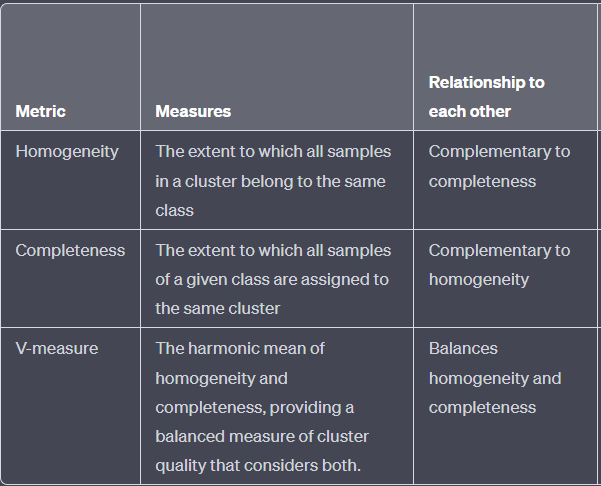

While these metrics are related, they can have different values for the same clustering result. For example, a clustering algorithm that produces two clusters, one containing all cats and the other containing all dogs, could have high homogeneity but low completeness if some of the cats are assigned to the dog cluster, and vice versa. In this case, the V-measure would reflect this trade-off between homogeneity and completeness and provide a more accurate assessment of the clustering result.

### Overall, while homogeneity, completeness, and the V-measure are all important metrics for evaluating clustering results, they should be used in conjunction with other metrics, such as the Silhouette Coefficient and the Davies-Bouldin Index, to get a more complete evaluation.

### Q10. How can the Silhouette Coefficient be used to compare the quality of different clustering algorithms on the same dataset? What are some potential issues to watch out for?

### Ans:- The Silhouette Coefficient can be used to compare the quality of different clustering algorithms on the same dataset by calculating the Silhouette Coefficient for each clustering algorithm and comparing the values.

### The Silhouette Coefficient can help determine which algorithm produces the clustering result with the highest quality based on the following criteria:

* The average Silhouette Coefficient for all samples should be high.
* The distribution of Silhouette Coefficient values for each cluster should be narrow, indicating that samples within each cluster are similar to each other and dissimilar to samples in other clusters.
### However, there are some potential issues to watch out for when using the Silhouette Coefficient to compare clustering algorithms:

* The Silhouette Coefficient is affected by the number of clusters, so it is important to use the same number of clusters for each algorithm being compared.
* The Silhouette Coefficient assumes that the clusters are well separated and non-overlapping, so it may not be appropriate for all types of datasets.
* The Silhouette Coefficient is a local measure of cluster quality and may not reflect the global structure of the dataset. Therefore, it is important to use other evaluation metrics in conjunction with the Silhouette Coefficient.

### Q11. How does the Davies-Bouldin Index measure the separation and compactness of clusters? What are some assumptions it makes about the data and the clusters?

### Ans:-The Davies-Bouldin index (DBI) is a metric for assessing the separation and compactness of clusters. It is based on the idea that good clusters are those that have low within-cluster variation and high between-cluster separation.
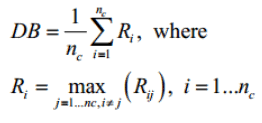

## DBI = (1/n) * sum_i(max_j(S_i + S_j) / M_i,j)
where n is the number of clusters, S_i is the within-cluster dispersion of cluster i, M_i,j is the between-cluster dispersion between cluster i and cluster j, and i and j are indices for the clusters.

##### The Davies-Bouldin Index assumes that the clusters are well separated and compact, meaning that the samples within each cluster are similar to each other and dissimilar to samples in other clusters. It also assumes that the data is Euclidean and that the clusters are roughly spherical and have similar sizes.

#### The Davies-Bouldin Index has the advantage of being easy to compute and interpret, but it also has some limitations. It can only be used for datasets with Euclidean distances and may not be appropriate for datasets with non-spherical clusters or clusters with significantly different sizes. Additionally, it may not be able to detect complex structures in the data and may favor solutions with more clusters.

### Q12. Can the Silhouette Coefficient be used to evaluate hierarchical clustering algorithms? If so, how?

### Ans:-Yes, the Silhouette Coefficient can be used to evaluate hierarchical clustering algorithms.

### In hierarchical clustering, the data is first divided into smaller subgroups, and then the subgroups are recursively merged to form larger clusters. The Silhouette Coefficient can be used to evaluate the quality of each level of the hierarchical clustering by computing the Silhouette Coefficient for each sample and then taking the average over all samples.

To calculate the Silhouette Coefficient for each sample, we first compute the average distance between the sample and all other samples in its cluster (a_i). We then compute the average distance between the sample and all other samples in the nearest cluster (b_i). The Silhouette Coefficient for the sample is then given by:

#### s_i = (b_i - a_i) / max(a_i, b_i)

### The average Silhouette Coefficient for the entire clustering is then computed by taking the mean of the Silhouette Coefficient for each sample.